# Pups and Pubs - Brewery Analysis With SQL, Python, and Tableau

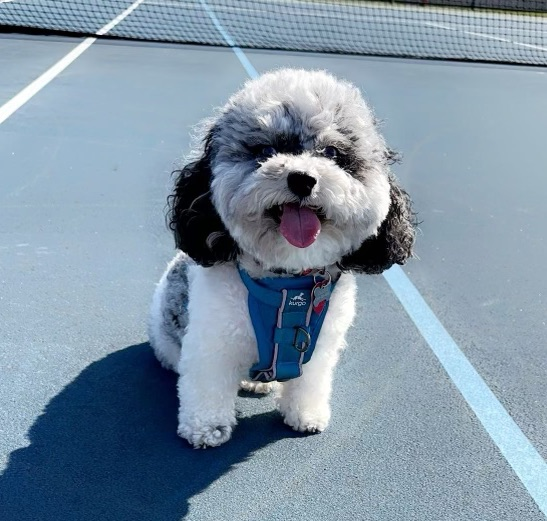 

*Image: Cassie at Hazel Park High School tennis courts. Credit: Emma Weintraub*

Name a better combo than dogs, sunny weather, and a cold beverage. That's the goal whenever I'm eager to try out a new brewery with my friends and family. Our dog Cassie loves to come on trips with us, and exploring new breweries is no exception. In Michigan, it's an easy task finding something new to try as breweries have rapidly opened up in the Great Lakes State. While there's never a shortage of breweries to experience, finding dog-friendly breweries is not always as simple. In this project, we'll explore a database full of brewery data to see what insights we can extract. At the end, we'll introduce a second data source to help us locate dog-friendly breweries in Michigan. We'll finish the project by building an interactive map of our dog-friendly breweries.

#### `breweries`

| column               | type         | description               |
|----------------------|------------------------------------------|----------------------------------|
| `brewery_id`         | text         | unique brewery id         |
| `brewery_name`       | text         | name of brewery                   |
| `brewery_type`       | text         | type of brewery (brewpub, micro, etc.)  |
| `address_1`          | text         | building address         |
| `address_2`          | text         | alternative address          |
| `address_3`          | text         | alternative address     |
| `city`               | text         | city of brewery  |
| `state_province`     | text         | state or province of brewery  |
| `postal_code`        | text         | postal code of brewery |
| `country`            | text         | country of brewery |
| `phone`              | text         | phone number of brewery |
| `website_url`        | text         | website of brewery |
| `longitude`          | numeric      | longitude coordinates |
| `latitude`           | numeric      | latitude coordinates |

We'll start by using python libraries `pandas`, `psycopg2`, and `sqlalchemy` to retrieve our breweries data from Open Brewery DB's GitHub repository (3).

In [1]:
import pandas as pd
import psycopg2 as pg2
from sqlalchemy import create_engine

In [3]:
conn = pg2.connect(database=database, user=user,password=password)
cur = conn.cursor()

engine = create_engine(engine_string)

url = ('https://raw.githubusercontent.com/openbrewerydb/openbrewerydb/master/breweries.csv')
df = pd.read_csv(url)

df.to_sql('breweries',con=engine, if_exists='replace')

206

Let's begin by getting a sample of 5 breweries from our database to make sure the data was successfully loaded. We'll then observe the samples to get an idea of what our data looks like.

In [7]:
%%sql

-- Get the first 5 rows from the breweries table
SELECT *
FROM breweries
LIMIT 5

Running query in 'brewery_database'

5 rows affected.

index,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,phone,website_url,longitude,latitude
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,4058160490,http://www.405brewing.com,-97.46818222,35.25738891
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,5129211545,http://www.512brewing.com,None,None
2,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,6195782311,http://10barrel.com,-117.129593,32.714813
3,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,5415851007,http://www.10barrel.com,-121.281706,44.08683531
4,e2e78bd8-80ff-4a61-a65c-3bfbd9d76ce2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,None,None,Bend,Oregon,97703-2465,United States,5415851007,None,-121.3288021,44.0575649


Looks like our python script loaded the data into our PostgreSQL database successfully! We can see all columns present as well as 5 sample data points. We can also see that there's null values in our dataset, but that's ok! When creating a new table, we can designate which columns we absolutely will not allow null values. Before loading the data into PostgreSQL, I wrote a query to make sure a table was generated with no null values allowed for `brewery_id` (primary key), `brewery_name`, `city`, `state_province`, and `country`. These will be the primary values we'll need. Now, we're ready to explore our data!

## 1. How many breweries are in the database?

In [8]:
%%sql

-- Get the total count of rows from breweries
SELECT COUNT(*)
FROM breweries

Running query in 'brewery_database'

1 rows affected.

count
8206


Looks like our database has 8206 total breweries listed from around the globe! That's a lot of breweries.

## 2. How many breweries are there in each country?

In [9]:
%%sql

-- Get all countries and respective brewery counts from breweries in descending order
SELECT country, COUNT(*) as cnt
FROM breweries
GROUP BY country
ORDER BY cnt DESC

Running query in 'brewery_database'

11 rows affected.

country,cnt
United States,7935
Ireland,70
England,62
South Korea,61
Poland,34
Austria,14
Portugal,14
Scotland,10
France,3
Isle of Man,2


Wow! The US has over 7935 breweries! That is quite a lead compared to all other countries listed. Another interesting observation is that the database shows two different 'United States' countries listed. Why is that? Let's take a look at the dataframe in python to find out.

In [10]:
df['country'].unique()

array(['United States', 'Ireland', 'England', 'South Korea', 'Portugal',
       'Poland', 'France', 'Isle of Man', 'Scotland', 'Austria',
       ' United States'], dtype=object)

It appears that there is an extra space present in one of the strings. Let's apply a `trim` function in SQL to clean that column.

In [11]:
%%sql

--remove beginning and ending spaces on each country string
UPDATE breweries
SET country = btrim (country, ' ')

Running query in 'brewery_database'

8206 rows affected.

In [12]:
%%sql

-- Get the US brewery count to check if the cleaning operation was successfull. 7935 -> 7936
SELECT country, COUNT(*)
FROM breweries
WHERE country = 'United States'
GROUP BY country

Running query in 'brewery_database'

1 rows affected.

country,count
United States,7936


## 3. How many breweries are there in each state in the US?

In [13]:
%%sql

-- get all US states and respective brewery counts from breweries
SELECT state_province, COUNT(*) as cnt
FROM breweries
WHERE country = 'United States'
GROUP BY state_province
ORDER BY cnt DESC

Running query in 'brewery_database'

54 rows affected.

state_province,cnt
California,912
Washington,471
Colorado,431
New York,418
Michigan,375
Texas,352
Pennsylvania,345
Florida,312
North Carolina,307
Ohio,303


Look at that! Michigan is in the top 5 states in the US regarding total number of breweries. Michigan is ranked 5th behind New York, Colorado, Washington, and California. Let's dive deeper into the Michigan brewery scene. 

## 4. What are the brewery types in Michigan?

In [14]:
%%sql

-- Get the brewery type and respective count from Michigan, US breweries in descending order
SELECT brewery_type, COUNT(*) AS total_breweries
FROM breweries
WHERE country = 'United States'
AND state_province = 'Michigan'
GROUP BY brewery_type
ORDER BY total_breweries DESC

Running query in 'brewery_database'

5 rows affected.

brewery_type,total_breweries
brewpub,199
micro,143
planning,21
regional,9
contract,3


The majority of breweries in Michigan are brewpubs closely followed by micro breweries. This makes sense if we consider that brewpubs are beer-focused restaurants and micro breweries are what most craft breweries are considered.

## 5. What cities in Michigan have the most breweries?

In [15]:
%%sql

-- Get the top 5 cities and respective brewery count from Michigan, US breweries in descending order
SELECT city, COUNT(*) AS total_breweries
FROM breweries
WHERE country = 'United States'
AND state_province = 'Michigan'
GROUP BY city
ORDER BY total_breweries DESC
LIMIT 5

Running query in 'brewery_database'

5 rows affected.

city,total_breweries
Grand Rapids,25
Kalamazoo,14
Detroit,13
Traverse City,12
Ann Arbor,11


We can see that the top 5 cities in Michigan with the most breweries includes Grand Rapids, Kalamazoo, Detroit, Traverse City, and Ann Arbor. Grand Rapids appears to be the top city for breweries by a large margin (11 more than the next leading city Kalamazoo). 

## 6. What is the breakdown of brewery types in the top 5 cities in Michigan?

In [16]:
%%sql

-- Get the city, brewery type, and respective brewery total from Michigan breweries grouped by city and type. Query ordered by city and brewery totals.
SELECT city, brewery_type, COUNT(*) AS total_breweries
FROM breweries
WHERE country = 'United States'
AND state_province = 'Michigan'
AND city IN ('Grand Rapids', 'Kalamazoo', 'Detroit', 'Traverse City', 'Ann Arbor')
GROUP BY city, brewery_type
ORDER BY city, total_breweries DESC

Running query in 'brewery_database'

16 rows affected.

city,brewery_type,total_breweries
Ann Arbor,brewpub,8
Ann Arbor,micro,2
Ann Arbor,planning,1
Detroit,brewpub,5
Detroit,micro,3
Detroit,regional,2
Detroit,planning,2
Detroit,contract,1
Grand Rapids,brewpub,21
Grand Rapids,micro,2


We can see that Grand Rapids has the largest concentration of any one brewery type with 21 brewpubs, but detroit has the largest variation including a brewpub, micro, regional, planning, and contract brewery.

## 7. If we pick a city, can we find which breweries are in a 50 mile radius?

Let's say that we are visiting my home town (Midland, MI), could we find out what the nearest breweries would be? We will use Midland's latitude and longitude coordinates (43.618183 and -84.234238 respectively). Let's first review how to find the distance between 2 points on earth in miles. 

**The equation (1) is defined as:**

>$$Distance = 3963 * arccos((sin(latitude_1) * sin(latitude_2)) + cos(latitude_1) * cos(latitude_2) * cos(longitude_2 - longitude_1))$$



In [17]:
%%sql

-- Get the name, city, address, state, postal code, lat and long coordinates where there location is within 50 miles of Midland, MI
SELECT name, city, address_1, state_province AS state, postal_code, latitude, longitude
FROM breweries
WHERE 3963 * ACOS((SIN(radians (43.618183)) * SIN(radians (latitude))) + 
    COS(radians (43.618183)) * COS(radians (latitude)) * COS(radians (longitude) - radians (-84.234238))) 
    <= 50

Running query in 'brewery_database'

12 rows affected.

name,city,address_1,state,postal_code,latitude,longitude
Alma Brewing Co,Alma,208 E Superior St,Michigan,48801-1819,43.37888808,-84.6588719
Cranker's Restaurant & Brewery,Mount Pleasant,1207 E Pickard St,Michigan,48858-1901,43.61176916,-84.76071102
Four Leaf Brewing,Clare,412 N McEwan St,Michigan,48617-1403,43.8256884,-84.7683591
Frankenmuth Brewing Co,Frankenmuth,425 S Main St,Michigan,48734-1615,43.32893336,-83.73929404
Loggers Brewing Company,Saginaw,1215 S River Rd,Michigan,48609-5208,43.40518225,-84.05193542
Midland Brewing Co,Midland,5011 N Saginaw Road,Michigan,48642,43.6408678,-84.2910925
Mountain Town Brewing Co,Mt Pleasant,614 W Pickard St,Michigan,48858-1504,43.61180948,-84.78689552
Mountain Town Station Restaurant & Brew Pub,Mt Pleasant,506 W Broadway St,Michigan,48858-2441,43.604568,-84.7822205
Oracle Brewing Company,Saginaw,122 N Michigan Ave,Michigan,48602-4234,43.417723,-83.96401351
Tenacity Brewing,Flint,119 N Grand Traverse St,Michigan,48503-5620,43.01522788,-83.69663179


## 8. Which breweries are dog-friendly in Michigan?

What if we wanted to go on a road trip and check out some breweries on the way, but we also wanted to bring our dog? That data is not currently in our brewery database, so we will need to look elsewhere to find the data. Luckily, we can use Kevin McKinney's currated list of dog friendly Michigan breweries (2)! We'll first need to scrape the website and grab the needed data using python's `beautifulsoup` library. We'll clean the data to remove any trailing spaces or unnecessary characters, then we'll upload the data into a new table in our SQL database.

In [18]:
import requests
import bs4
import re

# Pull the raw html from the website
res = requests.get("https://michiganbreweryreview.com/michigan-dog-friendly-breweries/2018/8/2/the-ever-growing-list-of-k-9-friendly-breweries?format=amp")
soup = bs4.BeautifulSoup(res.text,"lxml")

dog_brewery_list = []
cleaned_soup = []

#parse the html data looking for brewery names and the respective cities. Place the items into a cleaned_soup list
it = iter(soup.select('p')[1].contents)

for item in it:
    if item.text == "" or item.text == " " or item.text == ".":
        next
    else:
        cleaned_soup.append(item)

#iterate through the clean_soup list and remove any unnecessary spaces, dashes, or parenthesis. Place the cleaned items into a dog_brewery_list
it = iter(cleaned_soup)  

for item in it:
    dog_brewery_list.append((item.text.strip(),re.sub("[\(\[].*?[\)\]]", "", next(it).text.split('- ',1)[-1].split('- ',1)[-1].strip().strip())))

#Create a dataframe from dog_brewery_list with columns: 'brewery_name' and 'city'. Send the dataframe to posgresql as a new table
dog_df = pd.DataFrame(dog_brewery_list,columns = ['brewery_name','city'])
dog_df.to_sql('dog_breweries',con=engine, if_exists='replace')

136

We now have two tables in our database. The two tables include:

#### `breweries`

| column               | type         | description               |
|----------------------|------------------------------------------|----------------------------------|
| `brewery_id`         | text         | unique brewery id         |
| `brewery_name`       | text         | name of brewery                   |
| `brewery_type`       | text         | type of brewery (brewpub, micro, etc.)  |
| `address_1`          | text         | building address         |
| `address_2`          | text         | alternative address          |
| `address_3`          | text         | alternative address     |
| `city`               | text         | city of brewery  |
| `state_province`     | text         | state or province of brewery  |
| `postal_code`        | text         | postal code of brewery |
| `country`            | text         | country of brewery |
| `phone`              | text         | phone number of brewery |
| `website_url`        | text         | website of brewery |
| `longitude`          | numeric      | longitude coordinates |
| `latitude`           | numeric      | latitude coordinates |




#### `dog_breweries`

| column               | type         | description               |
|----------------------|------------------------------------------|----------------------------------|
| `brewery_name`       | text         | name of brewery                   |
| `city`               | text         | city of brewery  |

We need to join our two tables together to determine which breweries are dog-friendly from our original breweries table. Before we conduct our join, we will clean the columns that we'll join on to make sure we can find the proper match in both tables.

In [19]:
%%sql

-- trim both city and name string sides of all spaces and replace any dashes or spaces with empty space on the breweries table
UPDATE breweries
SET name = rtrim (btrim (replace (replace (name, '-', ' '), '.', ''), ' '), '.'), city = btrim (city, ' ')

Running query in 'brewery_database'

8206 rows affected.

In [20]:
%%sql

-- trim both city and name string sides of all spaces and replace any dashes or spaces with empty space on the dog_breweries table
UPDATE dog_breweries
SET brewery_name = rtrim (btrim (replace (replace (brewery_name, '-', ' '), '.', ''), ' '), '.'), city = btrim (city, ' ')

Running query in 'brewery_database'

136 rows affected.

In [21]:
%%sql

-- Replace 'St.' with 'Saint' under the city column in the dog_breweries table
UPDATE dog_breweries
SET city = replace (city, 'St. Clair Shores', 'Saint Clair Shores')

Running query in 'brewery_database'

136 rows affected.

What we want to accomplish is an `INNER JOIN` between the two tables to only include breweries that both tables share. In doing so, we will only include breweries that are dog friendly while also now having access to their locations. Unfortunately, this is not as easy of a task as it seems. While the `breweries` table has unique id's for each brewery, the `dog_breweries` does not. Because of this, we will need to match the tables based on their names. This may seem straight-forward but there's a lot that can go wrong such as mispellings, mix-matched words, additional spaces, etc. Any of these would result in a failed match. Thankfully, we can use fuzzy string matching to help us combat this issue. We'll look for words that are similar to one another instead of perfect matches. For extra accuracy, we'll also only match breweries from both tables if both cities and the first word in the name also match.

In [23]:
%%sql

-- First, select all breweries in Michigan that are not 'TBD'. 
-- Then, grab all breweries in michigan where the names are similar, the cities match, and the first word in each name matches
SELECT *
FROM
   (SELECT *
    FROM breweries
    WHERE breweries.state_province = 'Michigan'
    AND breweries.name <> 'TBD') AS mich_brew
JOIN dog_breweries ON SIMILARITY (mich_brew.name, dog_breweries.brewery_name) > 0.2
and mich_brew.city = dog_breweries.city
and UPPER(SUBSTRING(mich_brew.name, 1, POSITION(' ' IN mich_brew.name))) = 
    UPPER(SUBSTRING(dog_breweries.brewery_name, 1, POSITION(' ' IN dog_breweries.brewery_name)))
ORDER BY mich_brew.name

Running query in 'brewery_database'

98 rows affected.

index,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,phone,website_url,longitude,latitude,index_1,brewery_name,city_1
23,d5cb896d-3e99-4e19-9693-5e06ce987e53,127 Brewing,micro,3090 Shirley Dr,None,None,Jackson,Michigan,49201-7010,United States,5172581346,None,-84.43116792,42.28667212,0,127 Brewing,Jackson
433,ce507918-f969-4d44-a218-daca121c4bd0,Ascension Brewing Company,brewpub,42000 Grand River Ave,None,None,Novi,Michigan,48375-1831,United States,2483082093,http://www.ascension.beer,-83.4609783,42.4783271,5,Ascension Brewing Co,Novi
467,70fc7667-dda2-4cf0-ae7e-cbb43b5c43c4,Atwater Brewing Co,regional,237 Joseph Campau St,None,None,Detroit,Michigan,48207-4107,United States,3138779205,http://www.atwaterbeer.com,-83.072904,42.4190883,6,Atwater Brewery,Detroit
468,14693124-55bc-43e9-817e-b99a85f662ac,Atwater Grand Rapids,brewpub,201 Michigan St NW,None,None,Grand Rapids,Michigan,49503-2323,United States,6166493020,None,-85.672454,42.970463,8,Atwater Brewery,Grand Rapids
469,89d36a6d-1226-4c61-b4c6-22676a55a364,Atwater In the Park Biergarten and Tap House,brewpub,1175 Lakepointe St,None,None,Grosse Pointe Park,Michigan,48230-1319,United States,3133445104,http://www.atwaterbeer.com,-82.9399103,42.3814617,7,Atwater in the Park,Grosse Pointe Park
557,a79c77fa-dd4c-4e3f-bf34-c50ae8032f5c,Baffin Brewing Co,micro,25113 Jefferson Ave,None,None,Saint Clair Shores,Michigan,48081-2303,United States,5862187990,http://baffinbrewing.com,-82.888964,42.472227,9,Baffin Brewing Co,Saint Clair Shores
638,545b51b8-caf4-4c63-aea4-48910ddef4c7,Barn Brewers,brewpub,114 N Main St,None,None,Lawton,Michigan,49065-8634,United States,2692990482,http://www.barnbrewersbrewery.com,-85.84966443,42.16834814,10,Barn Brewery Brewers,Lawton
651,4fc60749-c0d0-4f94-ab92-e5bf566d455e,Barrel and Beam,micro,260 Northwoods RD,None,None,Marquette,Michigan,49855,United States,9062732559,http://www.barrelandbeam.com,-87.4722168,46.54578,11,Barrel + Beam,Marquette
684,e9ce69e2-13cf-48bd-81e2-10235db692aa,Batch Brewing Co,brewpub,1400 Porter St,None,None,Detroit,Michigan,48216-1934,United States,3133388008,http://www.BatchBrewingCompany.com,-83.088689,42.3184806,12,Batch Brewing Co,Detroit
847,71ed116d-2a0c-405f-9595-66b00f37030d,Biere De Mac Brew Works,micro,14277 N Mackinaw Hwy,None,None,Mackinaw City,Michigan,49701-8622,United States,2314277007,http://www.bieredemac.com,None,None,14,Biere De Mac Brew Works,Mackinaw City


Nice! We found 98 matches between the two tables! With a smaller data set such as this, we could alternatively download the dataset into excel and manually check for matching breweries as well.

Now that we have a dataset of dog-friendly breweries, let's create a data viz! We'll first upload the data into a new SQL table, then we'll connect the data to Tableau and build our data viz.

In [24]:
%%sql

CREATE TABLE dog_brewery_join AS
SELECT id, name, brewery_type, address_1, mich_brew.city, state_province, postal_code, country, phone, longitude, latitude
FROM
  (SELECT *
   FROM breweries
   WHERE breweries.state_province = 'Michigan'
   AND breweries.name <> 'TBD'
  )AS mich_brew
JOIN dog_breweries ON SIMILARITY (mich_brew.name, dog_breweries.brewery_name) > 0.2
and mich_brew.city = dog_breweries.city
and UPPER(SUBSTRING(mich_brew.name, 1, POSITION(' ' IN mich_brew.name))) = 
    UPPER(SUBSTRING(dog_breweries.brewery_name, 1, POSITION(' ' IN dog_breweries.brewery_name)))
ORDER BY mich_brew.name

Running query in 'brewery_database'

98 rows affected.

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1689990789504' style='position: relative'><noscript><a href='#'><img alt='Dog-Friendly Breweries in Michigan ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DogFriendlyMichiganBreweries&#47;Dog-FriendlyBreweriesinMichigan&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DogFriendlyMichiganBreweries&#47;Dog-FriendlyBreweriesinMichigan' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DogFriendlyMichiganBreweries&#47;Dog-FriendlyBreweriesinMichigan&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1689990789504');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# References

1. Bajaj, T. (2023, February 13). *Program for distance between two points on earth*. GeeksforGeeks. https://www.geeksforgeeks.org/program-distance-two-points-earth/

2. McKinney, K. (2022, July). Dog Friendly Breweries. *Review Before Your Next Brew*. https://michiganbreweryreview.com/michigan-dog-friendly-breweries/2018/8/2/the-ever-growing-list-of-k-9-friendly-breweries?format=amp

3. Chris Mears. Openbrewerydb. (2023). GitHub repository. https://github.com/openbrewerydb/openbrewerydb